<h1 style="text-align: center;color: black;"> <b> Brain MRI Tumor Detection </b></h1>
<h4 style="text-align: center;color: gray"> <em> A Deep Learning based project to detect and segmetate brain tumors in MRI images </em> </h4>

<div style="text-align: center;">

[**Alejandro C.**](https://github.com/alc98), [**Fabián G. Martín**](https://github.com/FabsGMartin), [**Raquel Hernández**](https://github.com/RaquelH18), [**Miguel J. de la Torre**](https://github.com/migueljdlt), [**Mary Marín**](https://github.com/mmarin3011-cloud),    [**Luna Pérez T.**](https://github.com/LunaPerezT)

</div>

<br></br>

---


<h3 style="text-align: center;color: black;"><b> PART 1 : Data Visualization and EDA </b></h3>

---

<br></br>

### **Introduction** 📚

<h5 style="text-align: center;color: black;"> <b>What Is a Low-Grade Glioma?</b></h5>
                
**Brain cancer**, and in particular **low-grade gliomas (LGG) requires early diagnosis and careful monitoring**. From a clinical perspective, low-grade gliomas often affect relatively young adults and may present with **seizures, headaches or subtle cognitive changes**. 
<br> </br>

<h5 style="text-align: center;color: black;"> <b>Why Early Detection Is Important?</b></h5>

  **Early detection of brain tumors** plays a crucial role in **improving patient outcomes**. When identified at an early stage, tumors are often smaller, less aggressive, and more responsive to treatment, **allowing clinicians to intervene before neurological damage becomes extensive**.    


- Around 80% of people living with a brain tumor require neurorehabilitation.
- In 2022, 322,000 new cases of brain and central nervous system tumors were estimated globally. 
- Brain tumors account for approximately 2% of all cancers diagnosed in adults and 15% of those diagnosed in children.
- About 80% of patients will present cognitive dysfunction, and 78% will present motor dysfunction.    
        
<br></br>


<h5 style="text-align: center;color: black;"> <b>Why MRI tumor segmentation is important in Low-Grade Glioma Patients?</b></h5>     

Even though they are classified as "low grade", **they can progress to high-grade gliomas**, so **longitudinal monitoring with MRI** and, when indicated, histopathological and molecular analysis are **key for prognosis and treatment planning**.
                
**MRI-based diagnosis** is especially valuable, as it **provides detailed structural information without exposing patients to radiation**. For radiologists and data scientists, MRI is interesting because it combines:
- **Anatomical detail** (T1- and T2-weighted sequences).
- **Edema and tumor extent** visualization (FLAIR).
- In some protocols, **functional information** such as diffusion and perfusion, which can correlate with cell density and vascularity. Integrating these heterogeneous sources of information is one of the main
motivations for using deep learning in neuro-oncology.   
    
<br></br>

---
### **Data Sources** 📂

The **LGG MRI Segmentation** dataset comes from the TCGA-LGG collection hosted on [***The Cancer Imaging Archive (TCIA)***](https://www.cancerimagingarchive.net/collection/tcga-lgg/) and was curated and released on [*Kaggle by Mateusz Buda*](https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation/data). It contains MRI scans of patients diagnosed with **low-grade gliomas**, along with expert-annotated **tumor segmentation masks**.

##### **Data Key Characteristics**
                  
- **Patients:** ~110  
- **Total images:** ~3,900 MRI slices  
- **Modalities:** Multi-channel `.tiff` images (commonly including FLAIR and contrast variations)  
- **Annotations:** Single-channel masks marking the tumor region  
- **Structure:** Each patient folder includes MRI slices and corresponding segmentation masks  

##### **Why It’s Useful for Brain Tumor Segmentation?**    
                    
- Provides **reliable ground-truth labels** for supervised learning.  
- Includes **multiple slices per patient**, giving models diverse anatomical variation.  

    
<br></br>

---

### **Preparation and data loading**

To explore the MRI scans and prepare the dataset for the segmentation task, several essential Python libraries were used. Each one plays a specific role in handling images, organizing file paths, and producing visual insights that help guide the modeling process.

- **pandas (`pd`)**  
  Used to structure metadata, manage file paths, and organize information into dataframes for efficient manipulation and inspection.

- **numpy (`np`)**  
  Provides fast numerical operations, enabling pixel-level computations and transformations needed when processing MRI images.

- **seaborn (`sns`)**  
  Supports the creation of clear and informative statistical visualizations, helping uncover patterns in the dataset (e.g., distribution of slices or mask presence).

- **matplotlib (`plt`)**  
  A core plotting library used for displaying MRI scans, segmentation masks, and combined overlays during exploratory analysis.

- **cv2 (OpenCV)**  
  Utilized for advanced image-reading and preprocessing tasks, such as resizing, filtering, and manipulating pixel values.

- **scikit-image (`skimage.io`)**  
  Provides simple utilities for loading and handling `.tif` medical images while preserving quality and structure.

- **glob**  
  Used for efficiently retrieving file paths from directories, allowing automated dataset construction and batch processing of images.

- **random**  
  Helps with random sampling and shuffling operations when splitting the dataset or visualizing random examples.

- **`%matplotlib inline`**  
  A Jupyter/Colab magic command that ensures plots appear directly inside the notebook, making the analysis workflow more interactive.

Together, these libraries create a flexible and efficient environment for inspecting the MRI dataset, generating meaningful visualizations, and preparing image-mask pairs for training a deep learning model in the context of low-grade glioma segmentation.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import cv2
from skimage import io
import glob
import random
%matplotlib inline

This short utility prepares a labeled dataset by scanning all mask files in the project directory.  
It automatically pairs each mask with its corresponding MRI image (removing the `_mask` suffix) and assigns a binary label: **1** if the mask contains any tumor pixels, **0** if not.  
Finally, it stores all paths and labels in a structured CSV file (`route_label.csv`) to streamline loading and preprocessing for model training.

In [ ]:
from glob import glob
mask_files = glob('./data/*/*_mask*')
train_files = [file.replace('_mask', '') for file in mask_files]
def label(mask):
    value = np.max(cv2.imread(mask))
    return '1' if value > 0 else '0'
brain_df = pd.DataFrame({"image_path": train_files,
                   "mask_path": mask_files,
                  "mask":[label(x) for x in mask_files]})
brain_df.to_csv('../data/route_label.csv')

In [19]:
brain_df=pd.read_csv('../data/route_label.csv',index_col=0)
brain_df.head(10)

image_path  \
0  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
1  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
2  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
3  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
4  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
5  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
6  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
7  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
8  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   
9  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...   

                                           mask_path  mask  
0  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0  
1  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0  
2  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0  
3  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     1  
4  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     1  
5  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0  
6  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0  
7  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     1  
8  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     1  
9  ./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...     0

### **Data Visualization** 📊🧠

Althought this dataset contains MRI images of 112 Low-Grade Glioma Patients. Every patient MRI contain ~30 images of different regions of the brain. Aditionally, health profesionals added a mask highlighting where the tumor is visible ([*Visit the acknowledgements of this TCIA data Collection*](https://www.cancerimagingarchive.net/collection/tcga-lgg/)). Consequently, the tumor is not present in the majority of the images 

In [22]:
brain_df['mask'].value_counts()

mask
0    2533
1    1366
Name: count, dtype: int64

In [21]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

matplotlib (`plt`) library used for displaying MRI scans, segmentation masks, and combined overlays during exploratory analysis.    
     
As we can see every image has its corresponding mask.

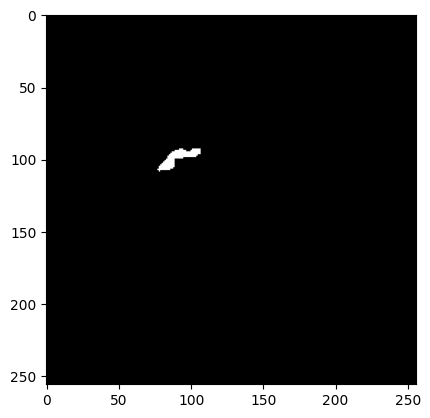

In [ ]:
plt.imshow(cv2.imread(brain_df.mask_path[623]))

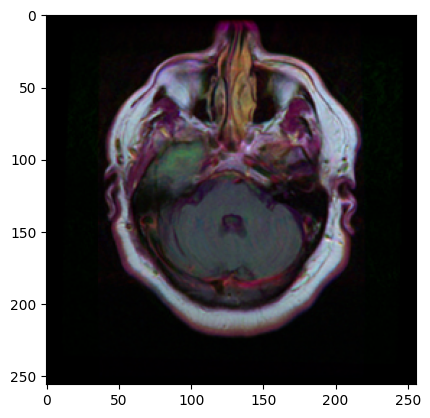

In [ ]:
plt.imshow(cv2.imread(brain_df.image_path[623]))

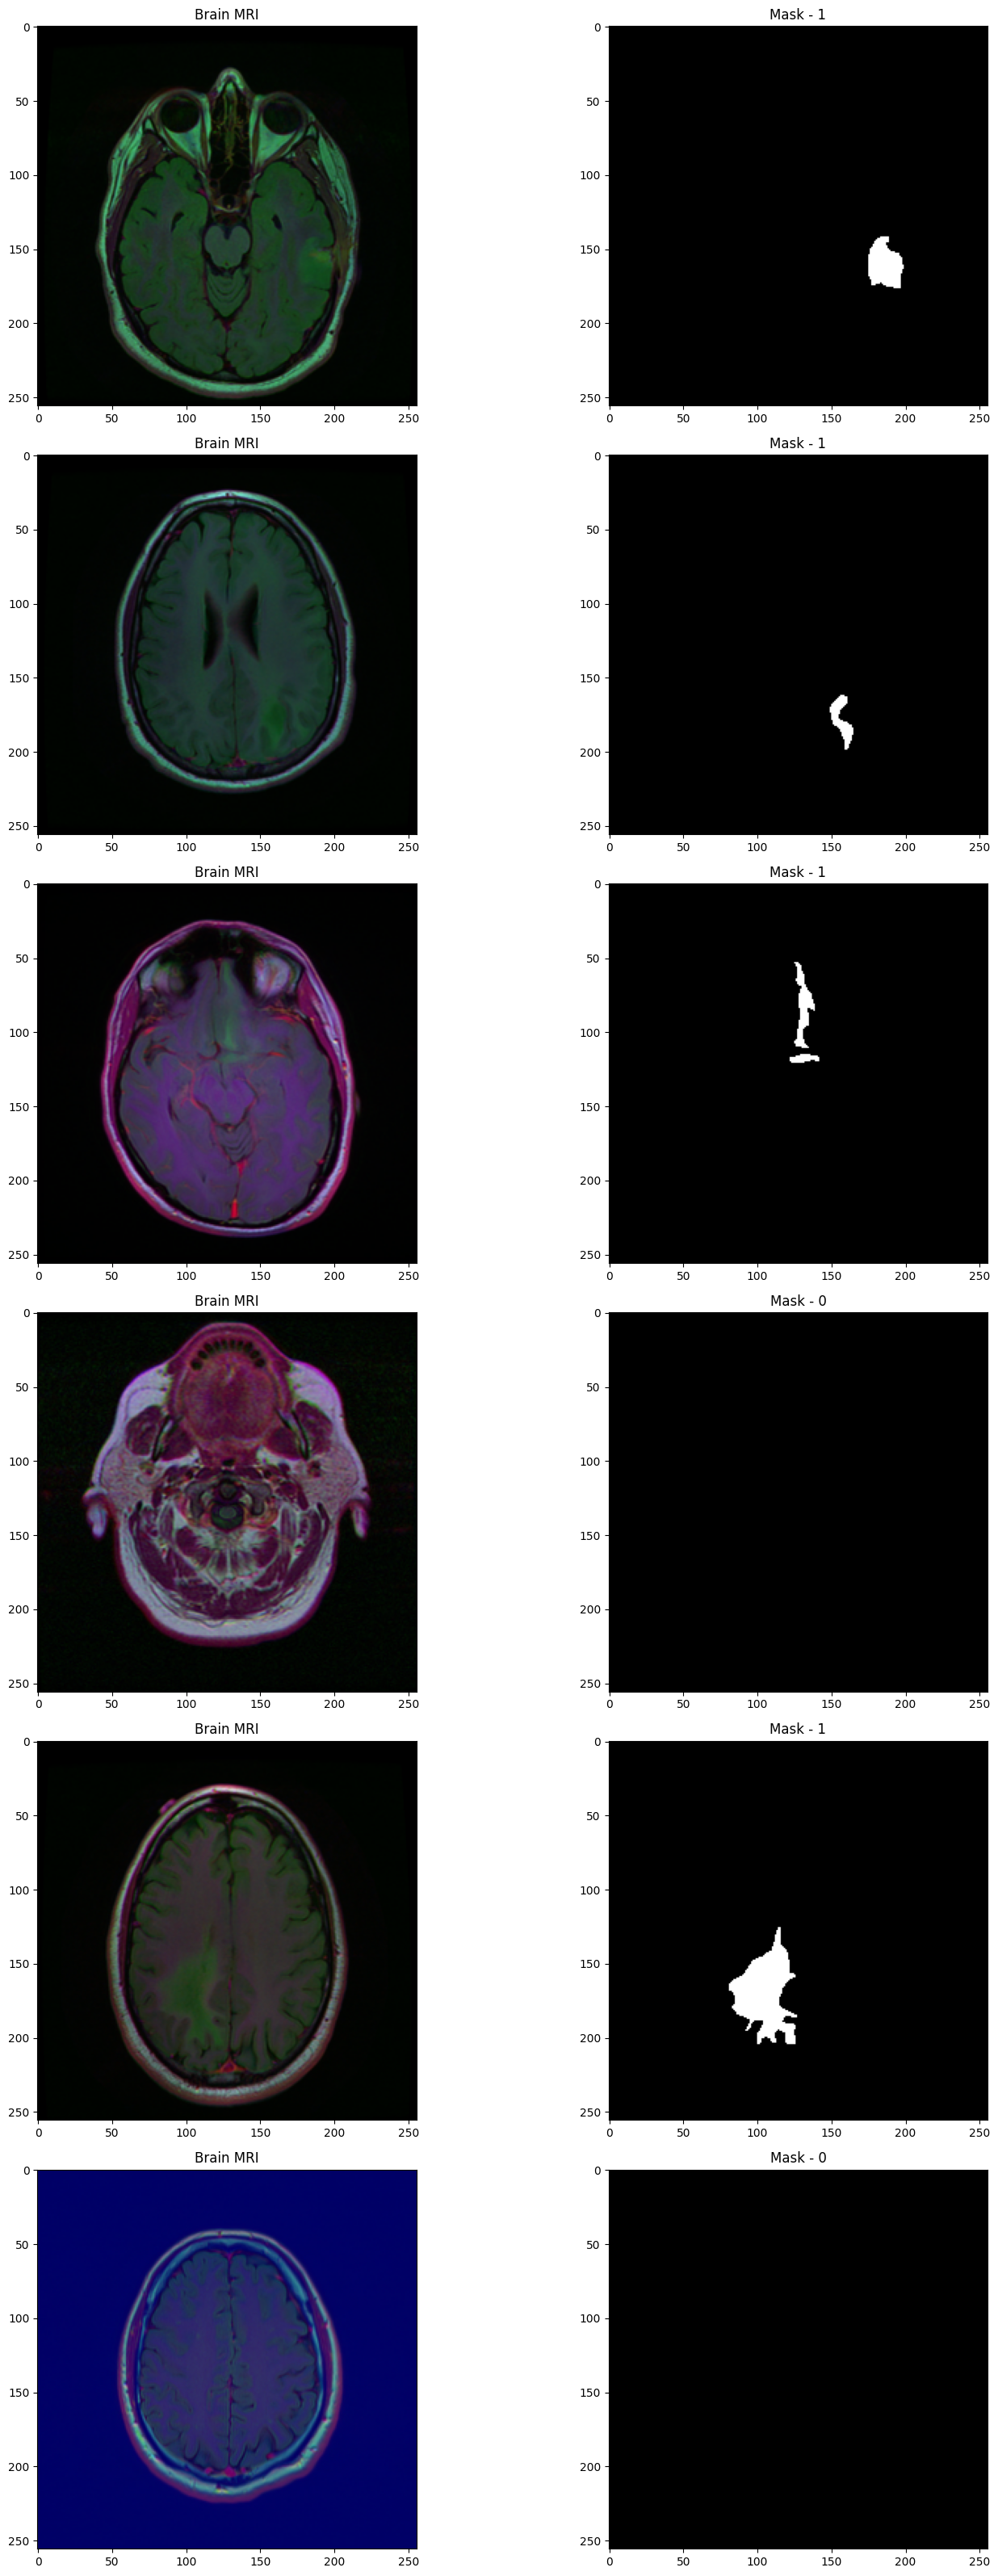

In [ ]:
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # select a random index
  axs[count][0].title.set_text("Brain MRI") # set title
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # show MRI
  axs[count][1].title.set_text("Mask - " + str(brain_df['mask'][i])) # plot title on the mask (0 or 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Show corresponding mask
  count += 1

fig.tight_layout()

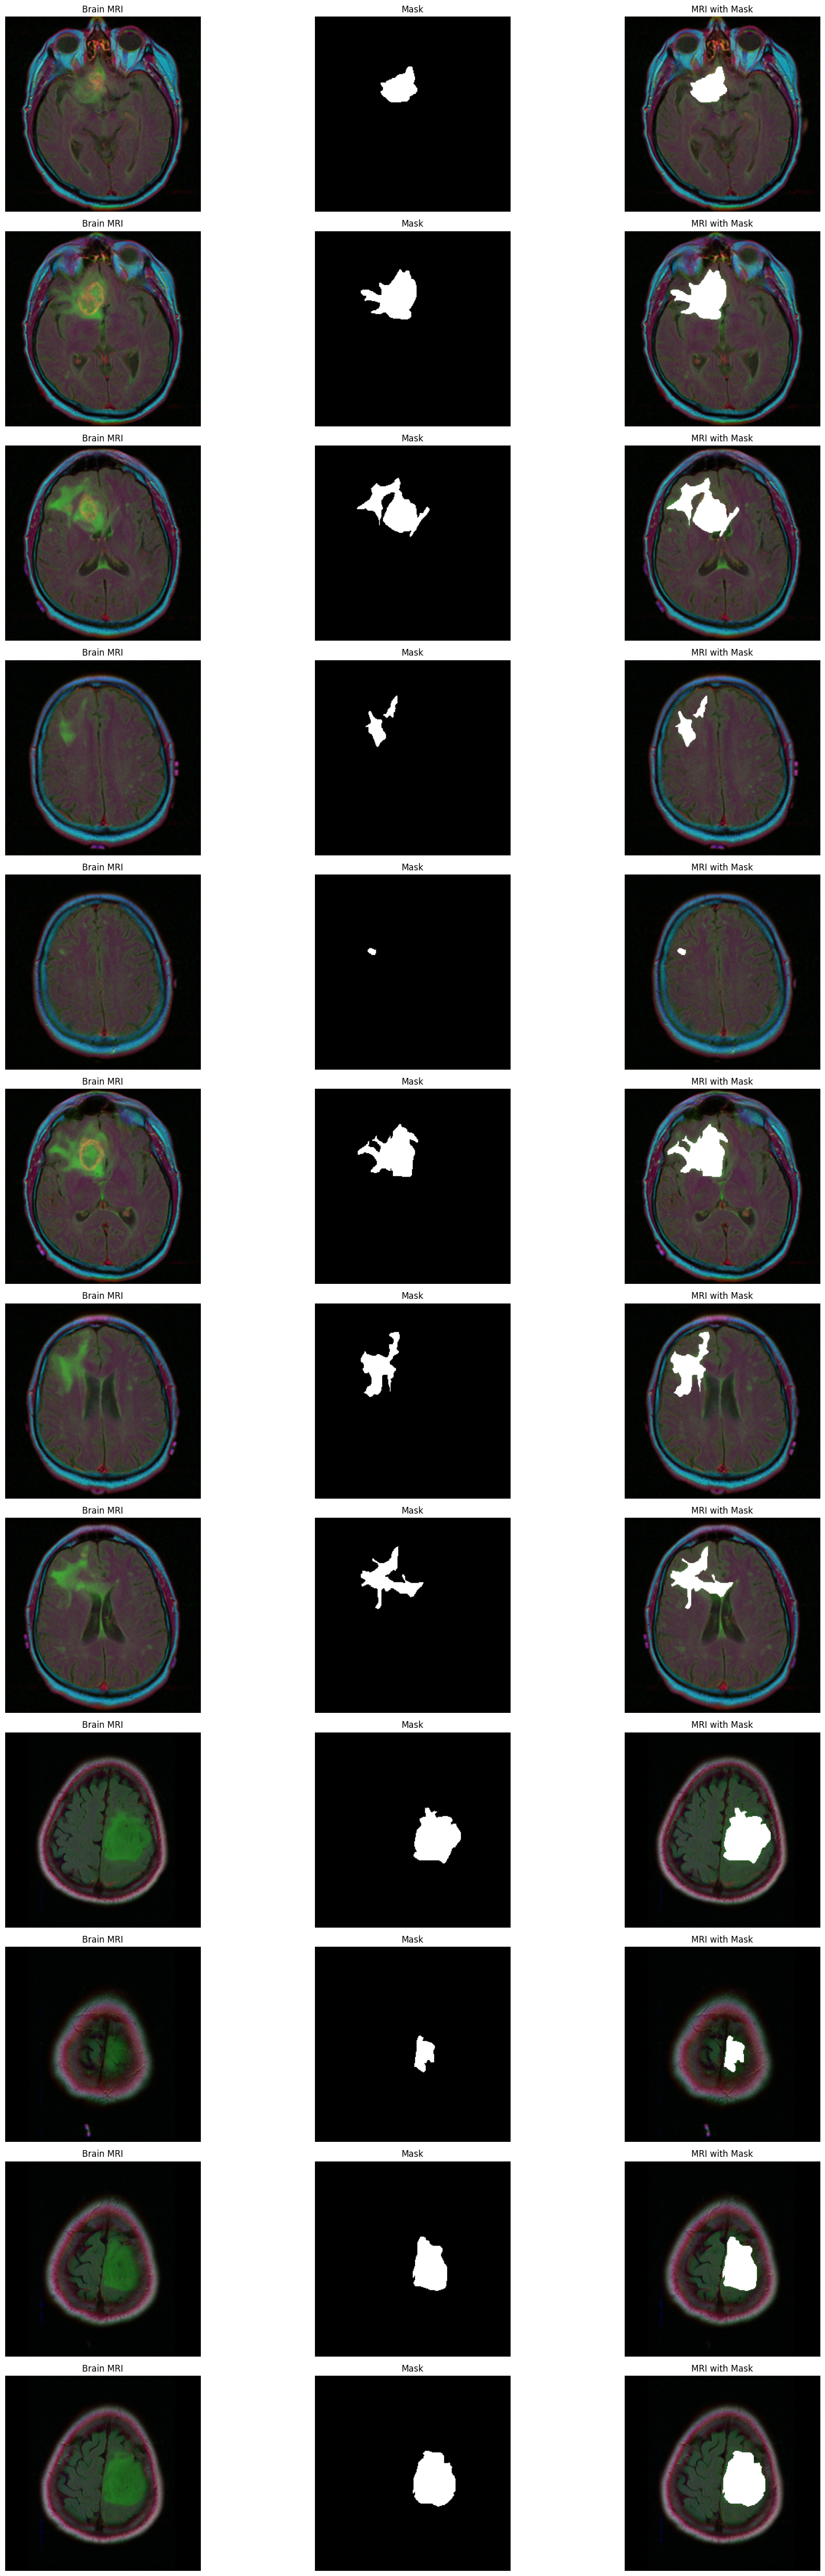

In [ ]:
count = 0
fig, axs = plt.subplots(12,3, figsize=(20,50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] == 1 and count < 12:

    img = io.imread(brain_df.image_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)
    axs[count][0].axis('off')

    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text("Mask")
    axs[count][1].imshow(mask, cmap = 'gray')
    axs[count][1].axis('off')

    img[mask == 255] = (255,255,255)
    axs[count][2].title.set_text("MRI with Mask")
    axs[count][2].imshow(img)
    axs[count][2].axis('off')
    count= 1+count

fig.tight_layout()